In [1]:
`m $apip install torch torchvision efficientnet_pytorch

Note: you may need to restart the kernel to use updated packages.


Total images: 15798
Training images: 12638, Validation images: 1579, Testing images: 1581


C:\Users\zahja\anaconda3\Lib\site-packages\torch\optim\lr_scheduler.py:62: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn(


Loaded pretrained weights for efficientnet-b3


Epoch 1/10: 100%|█████████████████████████████████████████| 843/843 [1:09:05<00:00,  4.92s/it, acc=70.18%, loss=0.1823]


Epoch [1/10] | Train Loss: 0.5543 | Train Acc: 70.18% | Val Loss: 0.3531 | Val Acc: 84.55%
🔥 Best model saved!


Epoch 2/10: 100%|█████████████████████████████████████████| 843/843 [1:16:50<00:00,  5.47s/it, acc=86.39%, loss=0.9472]


Epoch [2/10] | Train Loss: 0.3077 | Train Acc: 86.39% | Val Loss: 0.2391 | Val Acc: 89.87%
🔥 Best model saved!


Epoch 3/10: 100%|█████████████████████████████████████████| 843/843 [1:36:33<00:00,  6.87s/it, acc=93.04%, loss=0.1914]


Epoch [3/10] | Train Loss: 0.1761 | Train Acc: 93.04% | Val Loss: 0.1413 | Val Acc: 94.62%
🔥 Best model saved!


Epoch 4/10: 100%|█████████████████████████████████████████| 843/843 [1:12:17<00:00,  5.15s/it, acc=95.62%, loss=0.1945]


Epoch [4/10] | Train Loss: 0.1154 | Train Acc: 95.62% | Val Loss: 0.1203 | Val Acc: 95.25%
🔥 Best model saved!


Epoch 5/10: 100%|█████████████████████████████████████████| 843/843 [1:12:20<00:00,  5.15s/it, acc=96.99%, loss=0.0573]


Epoch [5/10] | Train Loss: 0.0796 | Train Acc: 96.99% | Val Loss: 0.1399 | Val Acc: 94.11%
😴 No improvement for 1 epochs


Epoch 6/10: 100%|█████████████████████████████████████████| 843/843 [1:03:08<00:00,  4.49s/it, acc=97.63%, loss=0.0255]


Epoch [6/10] | Train Loss: 0.0635 | Train Acc: 97.63% | Val Loss: 0.0953 | Val Acc: 96.52%
🔥 Best model saved!


Epoch 7/10: 100%|███████████████████████████████████████████| 843/843 [59:52<00:00,  4.26s/it, acc=97.86%, loss=0.0130]


Epoch [7/10] | Train Loss: 0.0615 | Train Acc: 97.86% | Val Loss: 0.1137 | Val Acc: 96.20%
😴 No improvement for 1 epochs


Epoch 8/10: 100%|███████████████████████████████████████████| 843/843 [57:03<00:00,  4.06s/it, acc=98.33%, loss=0.9035]


Epoch [8/10] | Train Loss: 0.0483 | Train Acc: 98.33% | Val Loss: 0.1539 | Val Acc: 96.26%
😴 No improvement for 2 epochs


Epoch 9/10: 100%|███████████████████████████████████████████| 843/843 [57:02<00:00,  4.06s/it, acc=98.63%, loss=0.0659]


Epoch [9/10] | Train Loss: 0.0385 | Train Acc: 98.63% | Val Loss: 0.0770 | Val Acc: 97.34%
🔥 Best model saved!


Epoch 10/10: 100%|██████████████████████████████████████████| 843/843 [56:54<00:00,  4.05s/it, acc=98.88%, loss=0.2273]


Epoch [10/10] | Train Loss: 0.0348 | Train Acc: 98.88% | Val Loss: 0.0718 | Val Acc: 97.85%
🔥 Best model saved!
🎯 Training Complete!
💾 Final model saved as final_efficientnet_stroke.pth


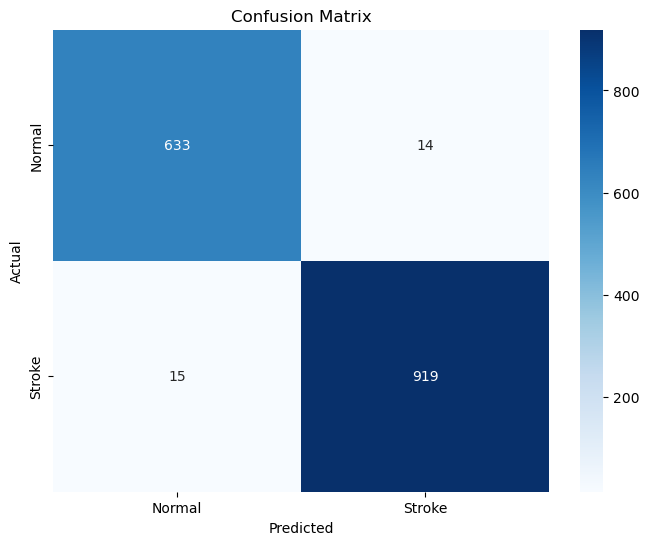

Classification Report:
              precision    recall  f1-score   support

      Normal       0.98      0.98      0.98       647
      Stroke       0.98      0.98      0.98       934

    accuracy                           0.98      1581
   macro avg       0.98      0.98      0.98      1581
weighted avg       0.98      0.98      0.98      1581

Overall Metrics:
Accuracy: 0.9817
Precision: 0.9817
Recall: 0.9817
F1-Score: 0.9817


In [7]:
# ============================
# 0. Import Required Libraries
# ============================
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.transforms as transforms
import torchvision.datasets as datasets
from torch.utils.data import DataLoader, random_split
from efficientnet_pytorch import EfficientNet
from tqdm import tqdm  # For real-time tracking
import os

# For evaluation metrics
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# ------------------------ Step 1: Data Preprocessing ------------------------ #

# Define image transformations
transform = transforms.Compose([
    transforms.Resize((224, 224)),  # Resize to EfficientNet input size
    transforms.ToTensor(),  # Convert image to tensor
    transforms.Normalize(mean=[0.5], std=[0.5])  # Normalize grayscale CT/MRI images
])

# Define dataset path
data_dir = "dataset"  # Root directory with 'Stroke' and 'No_Stroke' subfolders
dataset = datasets.ImageFolder(root=data_dir, transform=transform)

# ------------------------ Step 2: Split Dataset (80% Train, 10% Val, 10% Test) ------------------------ #

total_size = len(dataset)
train_size = int(0.8 * total_size)  # 80% training
val_size = int(0.1 * total_size)    # 10% validation
test_size = total_size - train_size - val_size  # 10% test

# Randomly split dataset
train_dataset, val_dataset, test_dataset = random_split(dataset, [train_size, val_size, test_size])

# ------------------------ Step 3: Create DataLoaders ------------------------ #

batch_size = 15  # Adjust based on GPU capacity

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

print(f"Total images: {total_size}")
print(f"Training images: {train_size}, Validation images: {val_size}, Testing images: {test_size}")

# ------------------------ Step 4: Load EfficientNet Model ------------------------ #

# Load pre-trained EfficientNet
model = EfficientNet.from_pretrained("efficientnet-b3")

# Modify the classifier for 2 classes (Stroke vs No Stroke)
num_ftrs = model._fc.in_features
model._fc = nn.Linear(num_ftrs, 2)  # Output 2 classes

# Move model to GPU if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = model.to(device)

# ------------------------ Step 5: Define Training Parameters ------------------------ #

criterion = nn.CrossEntropyLoss()  # Loss function for classification
optimizer = optim.Adam(model.parameters(), lr=0.0001)  # Adam optimizer
num_epochs = 10  # Adjust based on dataset size

# ------------------------ Step 6: Training Function with Early Stopping & Scheduler ------------------------ #

def train(model, train_loader, val_loader, criterion, optimizer, num_epochs, patience=5):
    best_val_acc = 0.0
    epochs_without_improvement = 0

    # Learning rate scheduler: Reduce LR if val_loss doesn't improve
    scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', patience=3, factor=0.5, verbose=True)

    for epoch in range(num_epochs):
        model.train()
        running_loss, correct, total = 0.0, 0, 0
        train_bar = tqdm(train_loader, desc=f"Epoch {epoch+1}/{num_epochs}", colour="green")

        for images, labels in train_bar:
            images, labels = images.to(device), labels.to(device)
            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            running_loss += loss.item()
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

            train_bar.set_postfix(loss=f"{loss.item():.4f}", acc=f"{(100 * correct / total):.2f}%")

        train_acc = 100 * correct / total
        val_loss, val_acc = evaluate(model, val_loader, criterion)

        print(f"Epoch [{epoch+1}/{num_epochs}] | Train Loss: {running_loss/len(train_loader):.4f} | Train Acc: {train_acc:.2f}% | Val Loss: {val_loss:.4f} | Val Acc: {val_acc:.2f}%")

        scheduler.step(val_loss)  # Adjust LR if val_loss plateaus

        # Save best model if improved
        if val_acc > best_val_acc:
            best_val_acc = val_acc
            epochs_without_improvement = 0
            torch.save(model.state_dict(), "best_efficientnet_stroke.pth")
            print("🔥 Best model saved!")
        else:
            epochs_without_improvement += 1
            print(f"😴 No improvement for {epochs_without_improvement} epochs")

        # Early stopping condition
        if epochs_without_improvement >= patience:
            print("⏹️ Early stopping triggered.")
            break

    print("🎯 Training Complete!")
    torch.save(model.state_dict(), "final_efficientnet_stroke.pth")
    print("💾 Final model saved as final_efficientnet_stroke.pth")


# ------------------------ Step 7: Evaluation Function ------------------------ #

def evaluate(model, val_loader, criterion):
    model.eval()  # Set to evaluation mode
    running_loss, correct, total = 0.0, 0, 0

    with torch.no_grad():
        for images, labels in val_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            loss = criterion(outputs, labels)
            running_loss += loss.item()
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    val_loss = running_loss / len(val_loader)
    val_acc = 100 * correct / total
    return val_loss, val_acc

# ------------------------ Step 8: Train the Model ------------------------ #

train(model, train_loader, val_loader, criterion, optimizer, num_epochs)

# ------------------------ Step 9: Test the Model and Print Evaluation Metrics ------------------------ #

def evaluate_metrics(model, test_loader):
    model.load_state_dict(torch.load("final_efficientnet_stroke.pth"))  # Load final model
    model.eval()
    y_true = []
    y_pred = []

    with torch.no_grad():
        for images, labels in test_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            _, predicted = torch.max(outputs, 1)
            y_true.extend(labels.cpu().numpy())
            y_pred.extend(predicted.cpu().numpy())

    # Confusion Matrix
    conf_matrix = confusion_matrix(y_true, y_pred)
    class_names = ['Normal', 'Stroke']
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.show()

    # Classification Report
    print("Classification Report:")
    print(classification_report(y_true, y_pred, target_names=class_names))

    # Overall Metrics
    print("Overall Metrics:")
    print(f"Accuracy: {accuracy_score(y_true, y_pred):.4f}")
    print(f"Precision: {precision_score(y_true, y_pred, average='weighted'):.4f}")
    print(f"Recall: {recall_score(y_true, y_pred, average='weighted'):.4f}")
    print(f"F1-Score: {f1_score(y_true, y_pred, average='weighted'):.4f}")

# Run evaluation and print all metrics
evaluate_metrics(model, test_loader)
